Import all the libraries required to load the data from tensorflow and keras.It creates an image classifier using a keras.Sequential model, and loads data using preprocessing.image_dataset_from_directory.

In [1]:
import matplotlib.pyplot as plot
import numpy as ny
import os
import PIL
import tensorflow as tensf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense,Dropout,Flatten,BatchNormalization,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D

In [45]:
#Loading in the data

(a_train, b_train), (a_test, b_test) = cifar10.load_data()

Classification of images 

In [46]:
cls_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Allot the figure size

In [47]:
img_hgt = 64
img_wdt = 64

(-0.5, 31.5, 31.5, -0.5)

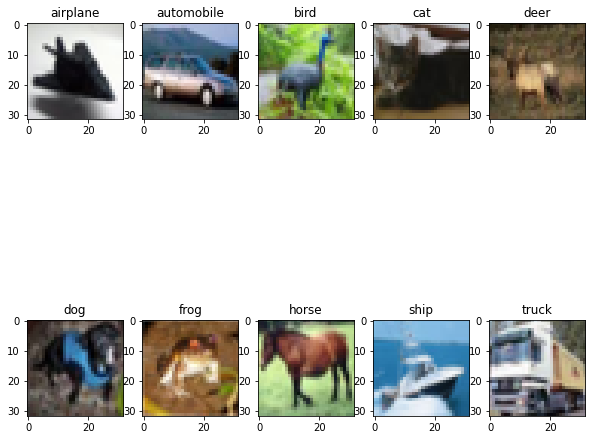

In [48]:
#plot first few images
plot.figure(figsize=(10,10))
for k in range(10):
  #define subplot
  x = plot.subplot(2,5,k + 1)
  it = ny.where(b_train[:]==k)[0]
  feat_it= a_train[it,::]

  # plot raw pixel data
  plot.imshow(feat_it[0])
  x.set_title(cls_name[k])
  #show the figure
plot.axis("on")

Use the Keras preprocessing layers for data augmentation, such as RandomFlip and RandomRotation.

Let's create a few preprocessing layers and apply them repeatedly to the same image.

In [49]:
data_aug = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(32,32,3)),
     layers.experimental.preprocessing.RandomRotation(0.05),
     layers.experimental.preprocessing.RandomZoom(0.05),
     layers.experimental.preprocessing.Rescaling(1/255),
    ]
)

Now train a model using the datasets you have just prepared.

The Sequential model consists of three convolution blocks (tf.keras.layers.Conv2D) with a max pooling layer (tf.keras.layers.MaxPooling2D) in each of them. There's a fully-connected layer (tf.keras.layers.Dense) with 128 units on top of it that is activated by a ReLU activation function ('relu'). This model has not been tuned for accuracy (the goal is to show you the mechanics).

In [51]:
cls_num = 10
#Define sequential model
model_build = Sequential()
model_build.add(data_aug)
model_build.add(Conv2D(64, (3, 3), input_shape=a_train.shape[1:], padding='same',activation='relu'))
model_build.add(MaxPooling2D())
model_build.add(BatchNormalization())
model_build.add(Conv2D(128, (3, 3), input_shape=a_train.shape[1:], padding='same',activation='relu'))
model_build.add(MaxPooling2D())
model_build.add(Conv2D(256, (3, 3), input_shape=a_train.shape[1:], padding='same',activation='relu'))
model_build.add(MaxPooling2D())
model_build.add(Dropout(0.1)) #Dropping the unnecessary data
model_build.add(BatchNormalization())
model_build.add(Flatten())
model_build.add(BatchNormalization())
model_build.add(Dense(64,activation='relu'))
model_build.add(Dense(cls_num))

Summarize the data loaded

In [52]:
model_build.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 16, 16, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 128)       

Choose the tf.keras.optimizers.Adam optimizer and tf.keras.losses.SparseCategoricalCrossentropy loss function. To view training and validation accuracy for each training epoch, pass the metrics argument to Model.compile.




In [53]:
model_build.compile(optimizer='adam',
              loss=tensf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train for a few epochs:

In [54]:
epochs = 25 
hist = model_build.fit(a_train,b_train,epochs = epochs,validation_data=(a_test,b_test))

Epoch 1/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4634 - accuracy: 0.4914 - val_loss: 1.8243 - val_accuracy: 0.4582
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1140 - accuracy: 0.6059 - val_loss: 1.5540 - val_accuracy: 0.5199
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9966 - accuracy: 0.6498 - val_loss: 1.0980 - val_accuracy: 0.6414
Epoch 4/25
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9236 - accuracy: 0.6774 - val_loss: 1.3871 - val_accuracy: 0.6364
Epoch 5/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8722 - accuracy: 0.6957 - val_loss: 0.9143 - val_accuracy: 0.6885
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8271 - accuracy: 0.7099 - val_loss: 0.9762 - val_accuracy: 0.6923
Epoch 7/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7774 - accuracy: 0.7272 - val_loss: 0.8737 - val_ac

Plot the graph of the training accuracy vs validation accuracy and training loss vs. validation loss over the number of epochs. This will help the developer of the model to make informed decisions about the architectural choices that need to be made.

Accuracy: 77.70%


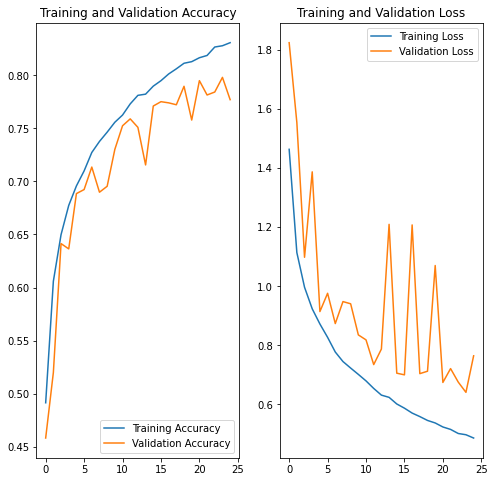

In [55]:
#Accuracy history
accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
#Loss history
loss=hist.history['loss']
validation_loss=hist.history['val_loss']

epochs_rne = range(epochs) #epochs range

# Model evaluation
scr = model_build.evaluate(a_test, b_test, verbose=0)
print("Accuracy: %.2f%%" % (scr[1]*100))
#Plot the graph of training vs vallidation accuracy
plot.figure(figsize=(8, 8))
plot.subplot(1, 2, 1)
plot.plot(epochs_rne, accuracy, label='Training Accuracy')
plot.plot(epochs_rne, validation_accuracy, label='Validation Accuracy')
plot.legend(loc='lower right')
plot.title('Training and Validation Accuracy')
#Plot the graph og training vs validation loss
plot.subplot(1, 2, 2)
plot.plot(epochs_rne, loss, label='Training Loss')
plot.plot(epochs_rne, validation_loss, label='Validation Loss')
plot.legend(loc='upper right')
plot.title('Training and Validation Loss')
plot.show()

Load the images from the internet using preprocessing.image and predict the image percentage.

This is most likely belongs to ship with a 99.89% percent confidence.
This is most likely belongs to bird with a 99.99% percent confidence.
This is most likely belongs to deer with a 71.77% percent confidence.
This is most likely belongs to frog with a 90.67% percent confidence.
This is most likely belongs to automobile with a 100.00% percent confidence.


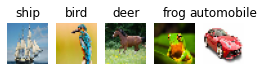

In [67]:
#Image url
url = {
         'ship': "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnPQU0Try6vN-5wYrmJ0fqjilZvEy6z2bC_w&usqp=CAU",
         'bird' : "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1FP-ALYf5rduiGeKrFCDDp4Zj2SJRYZZA7Q&usqp=CAU",
         'horse' :"https://images.all-free-download.com/images/graphiclarge/horse_gallop_animal_216002.jpg",
         'frog': "https://images.all-free-download.com/images/graphiclarge/cute_frog_05_hd_picture_168943.jpg",      
         'car' : "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTBCCq-IMPBfN2lYmtbTq2R6PMfmmGMh6h94Q&usqp=CAU"}
         
k=0
for key,val in url.items():
    k+=1
    img_url = val
    path=keras.utils.get_file(key,origin=img_url) #path to the image
    img = keras.preprocessing.image.load_img(path, target_size=(32,32)) #loading the image
    img_array = keras.preprocessing.image.img_to_array(img) #converting image to array
    img_array = tensf.expand_dims(img_array, 0)
    predict= model_build.predict(img_array) #predicting the model
    score = tensf.nn.softmax(predict[0]) #calculate the accuracy
    print("This is most likely belongs to {} with a {:.2f}% percent confidence."
    .format(cls_name[ny.argmax(score)] , 100*ny.max(score)))
    #plot the images
    m = plot.subplot(1,7,k+1)
    plot.imshow(img)
    m.set_title(cls_name[ny.argmax(score)])
    plot.axis('off')
